In [177]:
import numpy as np
import pandas as pd
from datetime import datetime
import time
import csv
import readline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import os
#from netCDF4 import Dataset, num2date, date2num
import math
import sys
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import xarray
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gc
from numpy import datetime64
import fimex_xarray
from netCDF4 import Dataset
import time
import sys
from radiosonde_class import Radiosonde
from tqdm import tqdm
import os
import matplotlib as mpl
import seaborn as sns
import glob as glob
from tqdm import tqdm
import geopy.distance
import plotly.express as px



Check for missing values in Radisonde files


In [227]:
longitude = []
nan_value_list = []
timepoint = []
RS_list = []


#Check for every folder that there are no result files that have too many nan values
for file in os.listdir("/home/norah/master/RS_data/"):


    for file2 in os.listdir("/home/norah/master/RS_data/"+file):

        RS_data=pd.read_fwf("/home/norah/master/RS_data/"+file+"/"+file2,header = None, skiprows = [0], names=["hPa", "height(m)", "Temp(C)", "DWPT", "Relh", "MIXR", "DRCT(deg)","WSPD(knot)", "8", "9", "10"])

        file_list1=file.strip("RS_")
        file_list=file_list1.split("_")
            
        file_list2=file2.strip(".txt")
        file_list3=file_list2.split("_")

        if os.path.isfile("/home/norah/master/data/no_hdisp_wspeed_int/int_sonde_data_wspeed"+file_list[0]+"_"+file_list[1]+"/"+file_list2+"_wspeed_model.nc") is True:
        
        
            limit2=np.where(RS_data["height(m)"]<10000)
            limit2=limit2[0].max()

            values = len(RS_data["height(m)"][0:10])
        
        
            nan_vals_5000=np.sum(RS_data["WSPD(knot)"][0:10].isna())/values
            values = len(RS_data["height(m)"][0:limit2])
            nan_vals=np.sum(RS_data["WSPD(knot)"][0:limit2].isna())/values
      
            if nan_vals_5000 > 0.30:
            
                file_list1=file.strip("RS_")
                file_list=file_list1.split("_")
            
                file_list2=file2.strip(".txt")
                file_list2=file_list2.split("_")

                timepoint.append(file_list[3]+"-"+file_list[2]+"-"+file_list[1]+"T"+file_list[0])
          
           
                RS_list.append(file_list2[0]+"_"+file_list2[1])
                nan_value_list.append(nan_vals_5000)

df_nan = pd.DataFrame({"Date and Time": timepoint, "Station": RS_list, "NaN Ratio Wind Speed": nan_value_list})
df_nan

df_nan.to_csv('nan_values_all_heights.csv')
df_nan




,Date and Time,Station,NaN Ratio Wind Speed


In [3]:
RS_num=[]
file_num=[]
timepoint=[]
for file in os.listdir("/home/norah/master/RS_data/"):
    i=0

    for file2 in os.listdir("/home/norah/master/RS_data/"+file):

        i+=1
            
    file_list1=file.strip("RS_")
    file_list=file_list1.split("_")
            
        #file_list2=file2.strip(".txt")
        #file_list2=file_list2.split("_")

    timepoint.append(file_list[3]+"-"+file_list[2]+"-"+file_list[1]+"T"+file_list[0])

    RS_num.append(i)

for file in os.listdir("/home/norah/master/data/wdir_int/"):
    i=0

    for file2 in os.listdir("/home/norah/master/data/wdir_int/"+file):

        i+=1


    file_num.append(i)
print(timepoint)
df34= pd.DataFrame({"Time": timepoint,"Available Sounding Files": RS_num, "Accepted Files": file_num})
df34
df34.to_csv('accepted_files.csv')

['1986-04-25T12', '1986-04-26T12', '1986-04-27T00', '1986-04-27T12', '1986-04-28T00', '1986-04-28T12', '1986-04-29T00', '1986-04-29T12', '1986-04-30T00', '1986-04-30T12', '1986-05-01T00', '1986-05-01T12', '1986-05-02T00', '1986-05-02T12', '1986-05-03T00', '1986-05-03T12', '1986-05-04T00', '1986-05-04T12', '1986-05-05T00', '1986-05-05T12', '1986-05-06T00', '1986-05-06T12', '1986-05-07T00', '1986-05-07T12', '1986-05-08T00', '1986-04-26T00']


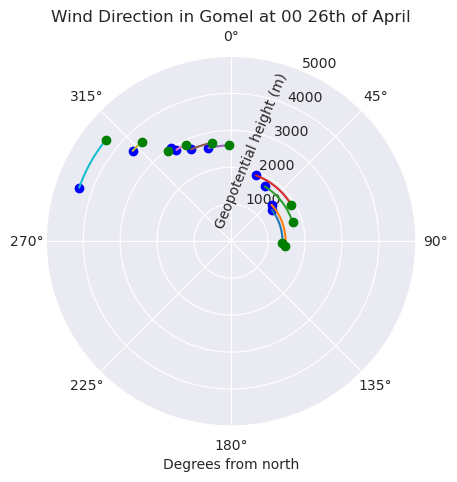

In [120]:
file="SE_2185_65.55_22.13_wdir_model.nc"
limit=6

wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir_int/int_sonde_data12_29/"+file)

file_list1=file.strip("_wdir_model.nc")
file_list=file_list1.split("_")

lat = float(file_list[2])
long = float(file_list[3])
b = datetime64('1986-04-29T12:00:00.000000000')
Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_12_29_04_1986/"+file_list1+".txt", lat, long,b)

Radiosonde1.find_horizontal_disp()
wdir = wind_data["wdir_model"].values
height = wind_data["height"].values
x = np.stack([wdir, Radiosonde1.data["DRCT(deg)"]])
y = np.stack([height, height])
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.radians(wdir[limit:]), height[limit:], "bo", label="interpolated model")
#ax.plot(np.radians(wdir), height, "bo", label="interpolated model")

def linspace2d(start, stop, num):
    assert len(start) == len(stop)
    output = np.ones([num, len(start)]) * np.nan
    for i, (sta, sto) in enumerate(zip(start, stop)):
        sta = sta % (2*np.pi)
        sto = sto % (2*np.pi)
        a_diff = (sto - sta)
        if abs(a_diff) >= np.pi:
            sta += 2*np.pi
        output[:, i] = np.linspace(sta, sto, num=num)
    return output

M = 50
sns.set_style(style="darkgrid")
thetas = linspace2d(np.radians(wdir[limit:]), np.radians(Radiosonde1.data["DRCT(deg)"][limit:]), M)  #Has to be changed for each radiosonde
#thetas = linspace2d(np.radians(wdir), np.radians(Radiosonde1.data["DRCT(deg)"]), M)
ax.plot(thetas, np.broadcast_to(height[limit:], thetas.shape))
#ax.plot(thetas, np.broadcast_to(height, thetas.shape))
ax.set_theta_zero_location("N")  # theta=0 at the top

ax.set_theta_direction(-1) 
#ax.plot(thetas, height)
ax.plot(np.radians(Radiosonde1.data["DRCT(deg)"][limit:]),Radiosonde1.data["height(m)"][limit:], "go", label="radiosonde")
#ax.plot(np.radians(Radiosonde1.data["DRCT(deg)"]),Radiosonde1.data["height(m)"], "go", label="radiosonde")
#ax.set_rscale("symlog")

#ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#

ax.set_rmax(5000)
#patch =mpl.patches.Arc([0,0], width=1, height=1, angle=30, theta1=0, theta2=40)
#ax.add_patch(patch)
ax.set_xlabel("Degrees from north")
#ax.set_rlabel("geopotential height")
ax.set_title("Wind Direction in Gomel at 00 26th of April")
label_position=ax.get_rlabel_position()
ax.text(np.radians(label_position-10),ax.get_rmax()/2.,'Geopotential height (m)',
        rotation=label_position+45,ha='center',va='center')
#plt.savefig("/home/norah/master/pictures/12_25/wdir_BY_26850.png")
plt.show()


In [171]:
wspeed_dist = []
speed=[]
speed2=[]
wdir_dist= []
wdir_dist2= []

file="SE_2527_57.67_12.3_wdir_model.nc"
file2="SE_2527_57.67_12.3_wspeed_model.nc"
wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir_int/int_sonde_data12_29/"+file)
wspeed_data=xarray.open_mfdataset("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed12_29/"+file2)

file_list1=file.strip("_wdir_model.nc")
file_list=file_list1.split("_")

lat = float(file_list[2])
long = float(file_list[3])
b = datetime64('1986-04-29T12:00:00.000000000')
Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_12_29_04_1986/"+file_list1+".txt", lat, long,b)


Radiosonde1.find_horizontal_disp()
wdir = wind_data["wdir_model"].values
height = wind_data["height"].values

#MAE in wind direction:

wdir = wind_data["wdir_model"].values
i=0
for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):
    upper=1000
    lower=0

    if upper>Radiosonde1.data["height(m)"][i]>lower:

        phi = abs(w-r)%369

        if phi > 180:
            phi = 360-phi
            wdir_dist.append(phi)

        else:
            wdir_dist.append(phi)
    i +=1
    
mae = np.mean(wdir_dist)

i=0
for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):
    upper=5000
    lower=1000

    if upper>Radiosonde1.data["height(m)"][i]>lower:

        phi = abs(w-r)%369

        if phi > 180:
            phi = 360-phi
            wdir_dist2.append(phi)

        else:
            wdir_dist2.append(phi)
    i +=1
    
mae_2 = np.mean(wdir_dist2)


#MAE in wind speed:     
wspeed = wspeed_data["wspeed_model"].values   

j=0
for w, r in zip(wspeed, Radiosonde1.data["WSPD(knot)"]):
    upper=1000
    lower=0
    if upper>Radiosonde1.data["height(m)"][j]>lower:

        phi = abs(w-r)

       
        wspeed_dist.append(phi)
        speed.append(r)
    j+=1
    
me = np.mean(wspeed_dist)
msped = np.mean(speed)

j=0
for w, r in zip(wspeed, Radiosonde1.data["WSPD(knot)"]):
    upper=5000
    lower=1000
    if upper>Radiosonde1.data["height(m)"][j]>lower:

        phi = abs(w-r)

       
        wspeed_dist.append(phi)
        speed2.append(r)
    j+=1
    
me = np.mean(wspeed_dist)
msped2 = np.mean(speed2)

print("speed")
print(msped)
print("speed2")
print(msped2)
print("error")
print(mae)
print("error2")
print(mae_2)

    





speed
2.8808888863999997
speed2
7.0552380891428585
error
15.358831429536655
error2
8.742964546384817


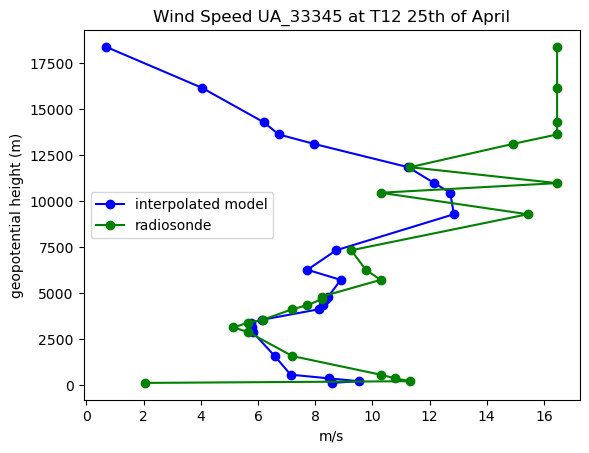

In [17]:
wind_data=xarray.open_mfdataset("/home/norah/master/data/int_sonde_data_wspeed00_27/RU_27037_59.23_39.87_wspeed_model.nc")

filename = "/home/norah/master/RS_data/RS_00_27_04_1986/RU_27037_59.23_39.87.txt"
b = datetime64('1986-04-27T00:00:00.000000000')
Radiosonde1 = Radiosonde(filename, 59.23,39.87,b)

Radiosonde1.find_horizontal_disp()
wdir = wind_data["wdir_model"].values
height = wind_data["height"].values

plt.plot(wdir, height, "bo-", label="interpolated model")
   # plt.plot(wdir2,hy2, "ro-")
plt.plot(Radiosonde1.data["WSPD(knot)"],Radiosonde1.data["height(m)"], "go-", label="radiosonde")
plt.legend()
plt.xlabel("m/s")
plt.ylabel("geopotential height (m)")
plt.title("Wind Speed UA_33345 at T12 25th of April")
#plt.savefig("/home/norah/master/pictures/00_26/wspeed_NO_1415.png")
plt.show()

RMSE

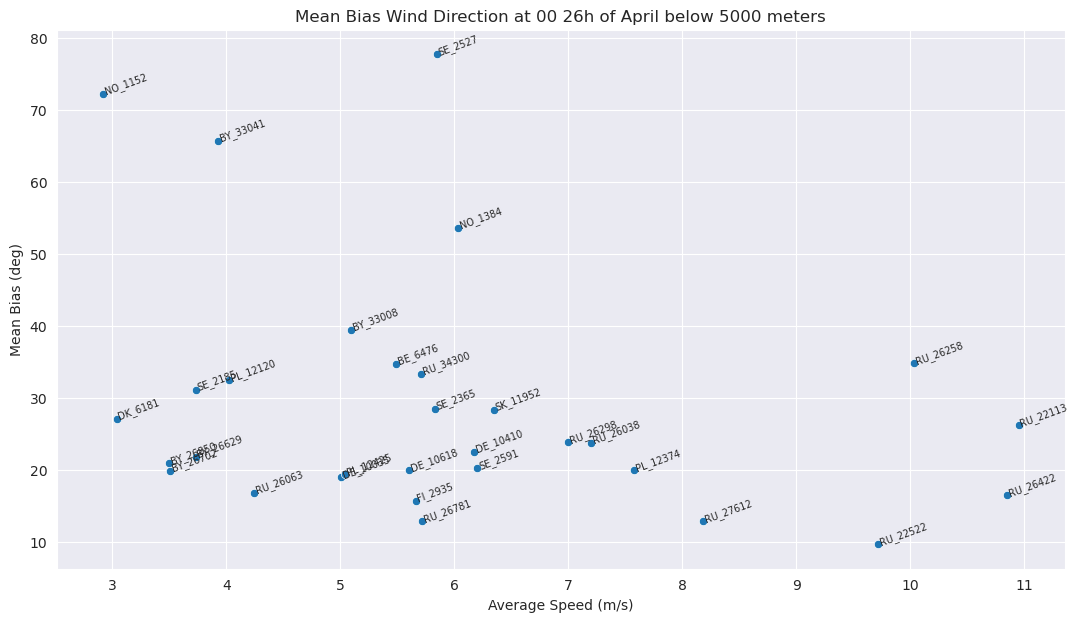

In [28]:
import seaborn as sns

rmse_list = []
longitude = []
names = []
all_distances = []
all_av_speed = []

for file in os.listdir("/home/norah/master/data/wdir_int/int_sonde_data00_30/"):

    wdir_dist = []
    b = datetime64('1986-04-30T00:00:00.000000000')
    wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir_int/int_sonde_data00_30/"+file)


    file_list1=file.strip("_wdir_model.nc")
    file_list=file_list1.split("_")
    names.append(file_list[0]+"_"+file_list[1])
    lat = float(file_list[2])
    long = float(file_list[3])

    Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_00_30_04_1986/"+file_list1+".txt", lat, long,b)
    Radiosonde1.find_horizontal_disp()
    
    #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

    #Radiosonde1.find_horizontal_disp()      
    wdir = wind_data["wdir_model"].values
    speed=[]
    i=0
    for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):
        upper=5000
        lower=0
        if upper>Radiosonde1.data["height(m)"][i]>lower:
            phi = np.abs(w-r)%360

            if phi > 180:
                phi = 360-phi
                wdir_dist.append(phi)

            else:
                wdir_dist.append(phi)
            speed.append(Radiosonde1.data["WSPD(knot)"][i])
        i+=1
        #print(r)
        #print(phi)
    #mse = np.square(np.subtract(wdir,Radiosonde1.data["WSPD(knot)"])).mean()

    rmse = np.mean(wdir_dist)
    coords_2 = (lat, long)
    coords_1 = (51.4, 30.1)
   
    distance = geopy.distance.geodesic(coords_2, coords_1).km  

    rmse_list.append(rmse)
    all_distances.append(distance)
    all_av_speed.append(np.mean(speed))


df = pd.DataFrame({"Mean Bias (deg)": rmse_list, "Distance From Chernobyl (km)":all_distances, "country":names, "Average Speed (m/s)": all_av_speed})
plt.figure(figsize=(13,7))
sns.set_style(style="darkgrid")
sns.scatterplot(data=df, x="Average Speed (m/s)", y="Mean Bias (deg)")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
  

plt.title("Mean Bias Wind Direction at 00 26h of April below 5000 meters")

for i, txt in enumerate(names):
    plt.text(all_av_speed[i], rmse_list[i], str(txt), fontsize=7, rotation=20)

#plt.savefig("/home/norah/master/pictures/00_26/RMSE_wdir.png")
plt.show()

Text(0.5, 1.0, 'Absolute Bias Wind Direction 26T12')

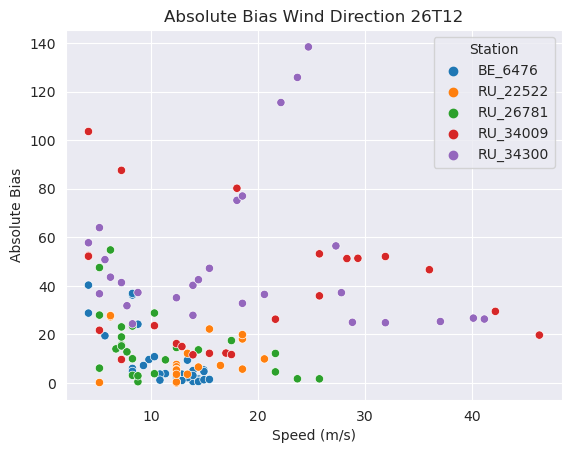

In [28]:
import seaborn as sns

rmse_list = []
longitude = []
names = []
wdir_dist = []

for file in os.listdir("/home/norah/master/data/wdir_int/int_sonde_data12_26/")[0:5]:
    b = datetime64('1986-04-26T12:00:00.000000000')
    wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir_int/int_sonde_data12_26/"+file)


    file_list1=file.strip("_wdir_model.nc")
    file_list=file_list1.split("_")
    lat = float(file_list[2])
    long = float(file_list[3])

    Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_12_26_04_1986/"+file_list1+".txt", lat, long,b)
    Radiosonde1.find_horizontal_disp()
    
    #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

    #Radiosonde1.find_horizontal_disp()      
    wdir = wind_data["wdir_model"].values
    i=0
    for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):

        phi = np.abs(w-r)%360

        if phi > 180:
            phi = 360-phi
            wdir_dist.append(phi)

        else:
            wdir_dist.append(phi)
 
        #print(r)
        #print(phi)
    #mse = np.square(np.subtract(wdir,Radiosonde1.data["WSPD(knot)"])).mean()
    
    

        rmse_list.append(phi)
        names.append(file_list[0]+"_"+file_list[1])
        longitude.append(Radiosonde1.data["WSPD(knot)"][i])
        i+=1

df = pd.DataFrame({"Absolute Bias": rmse_list, "Speed (m/s)":longitude, "Station":names})
sns.set_style(style="darkgrid")
sns.scatterplot(data=df, x="Speed (m/s)", y="Absolute Bias", hue="Station")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
  

plt.title("Absolute Bias Wind Direction 26T12")

#for i, txt in enumerate(names):
   # plt.text(longitude[i], rmse_list[i], str(txt))

#plt.savefig("/home/norah/master/pictures/00_26/RMSE_wdir.png")
#plt.show()

(34,)
(34,)


/tmp/ipykernel_56125/323032568.py:58: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  month_q1 = df.quantile(0.25)['RMSE']
/tmp/ipykernel_56125/323032568.py:59: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  month_q3 = df.quantile(0.75)['RMSE']


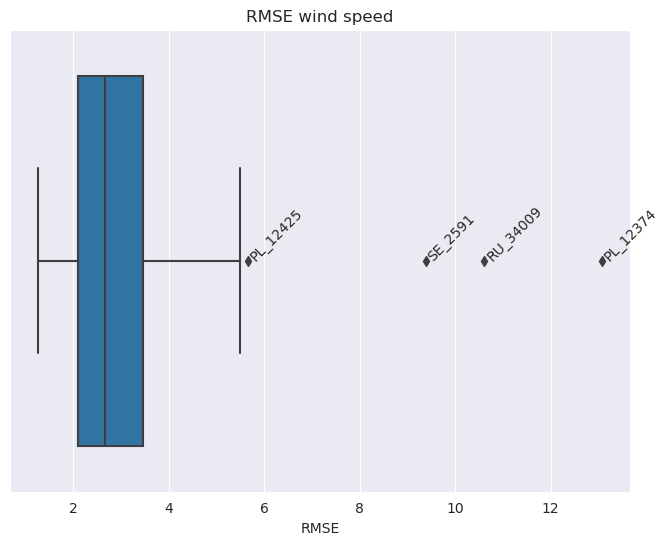

In [84]:
rmse_list = []
longitude = []
names = []
wdir_dist = []

for file in os.listdir("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed00_27/"):
    b = datetime64('1986-04-29T00:00:00.000000000')
    wind_data=xarray.open_mfdataset("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed00_27/"+file)


    file_list1=file.strip("_wspeed_model.nc")
    file_list=file_list1.split("_")
    names.append(file_list[0]+"_"+file_list[1])
    lat = float(file_list[2])
    long = float(file_list[3])

    Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_00_27_04_1986/"+file_list1+".txt", lat, long,b)
    Radiosonde1.find_horizontal_disp()
    
    #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

    #Radiosonde1.find_horizontal_disp()      
    wdir = wind_data["wdir_model"].values
 
  

    #for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):

        #phi = np.abs(w-r)%360

        #if phi > 180:
            #phi = 360-phi
            #wdir_dist.append(phi)

       # else:
           # wdir_dist.append(phi)
 
        #print(r)
        #print(phi)
    #mse = np.square(np.subtract(wdir,Radiosonde1.data["WSPD(knot)"])).mean()
    mse = np.square(np.subtract(wdir, Radiosonde1.data["WSPD(knot)"])).mean()
    rmse=math.sqrt(mse) 

    rmse_list.append(rmse)
    longitude.append(Radiosonde1.lon)

print(np.shape(rmse_list))
print(np.shape(longitude))
plt.figure(figsize=(8,6))
#fig, ax = plt.subplots()

#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
df = pd.DataFrame({"RMSE": rmse_list, "longitude":longitude, "country":names})
sns.set_style(style="darkgrid")

sns.boxplot(x=df["RMSE"])

month_q1 = df.quantile(0.25)['RMSE']
month_q3 = df.quantile(0.75)['RMSE']
outlier_top_lim = month_q3 + 1.5 * (month_q3 - month_q1)
#outlier_bottom_lim = month_q1 - 1.5 * (month_q3 - month_q1)

for i, val in enumerate(df["RMSE"]):
    #month = row[0].month - 1
    #val = row.Qm
    if val > outlier_top_lim:
        #plt.text(, val, f' {row[0].year % 100:02d}', ha='left', va='center')
   
        plt.text(rmse_list[i],0, str(df["country"][i]), ha='left', va='baseline', rotation=45)

plt.xlabel("RMSE")
plt.title("RMSE wind speed")


#plt.savefig("/home/norah/master/pictures/00_26/RMSE_wdir.png")
plt.show()

/tmp/ipykernel_56125/3840337856.py:56: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  month_q1 = df.quantile(0.25)['RMSE']
/tmp/ipykernel_56125/3840337856.py:57: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  month_q3 = df.quantile(0.75)['RMSE']


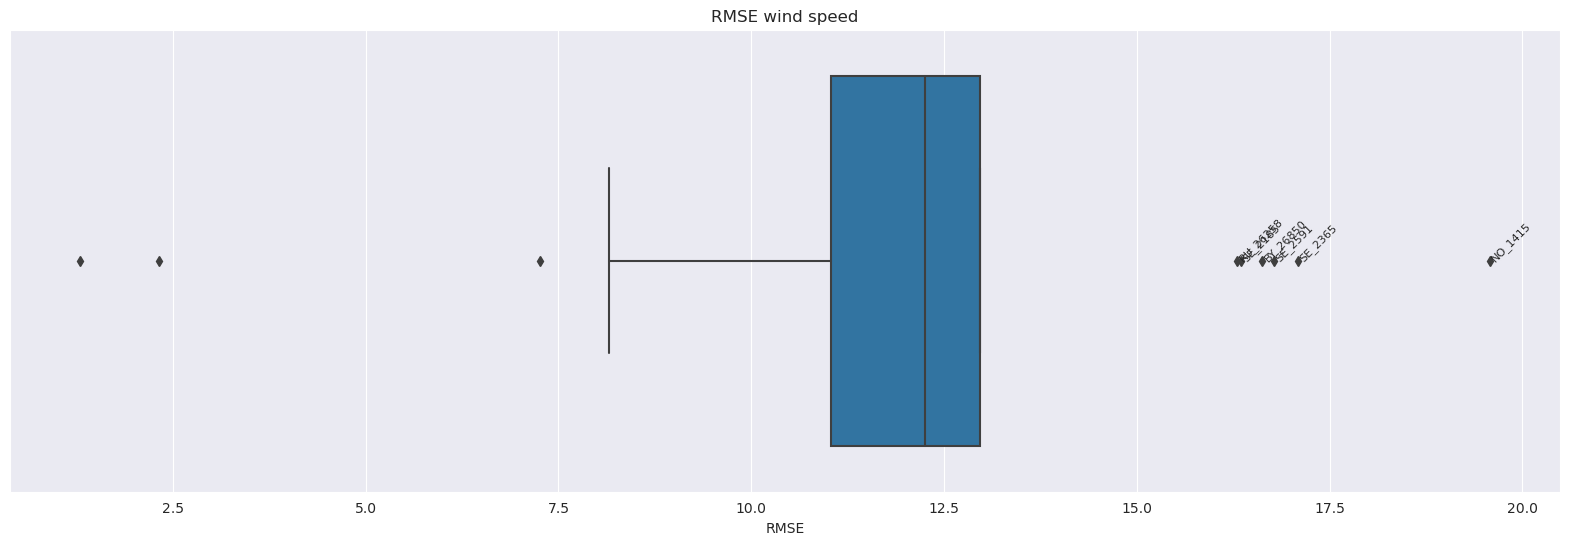

In [92]:
mean_bias_list = []
longitude = []
names = []
wdir_dist = []

for file in os.listdir("/home/norah/master/data/wdir_int/int_sonde_data12_27/"):
    b = datetime64('1986-04-27T12:00:00.000000000')
    wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir_int/int_sonde_data12_27/"+file)


    file_list1=file.strip("_wdir_model.nc")
    file_list=file_list1.split("_")
    names.append(file_list[0]+"_"+file_list[1])
    lat = float(file_list[2])
    long = float(file_list[3])

    Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_12_27_04_1986/"+file_list1+".txt", lat, long,b)
    Radiosonde1.find_horizontal_disp()
    
    #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

    #Radiosonde1.find_horizontal_disp()      
    wdir = wind_data["wdir_model"].values
 
  

    for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):

        phi = np.abs(w-r)%360

        if phi > 180:
            phi = 360-phi
            wdir_dist.append(-phi)

        else:
            wdir_dist.append(phi)
 
        #print(r)
        #print(phi)
    #mse = np.square(np.subtract(wdir,Radiosonde1.data["WSPD(knot)"])).mean()
    mean_bias = np.mean(wdir_dist)

    mean_bias_list.append(mean_bias)
    longitude.append(Radiosonde1.lon)


plt.figure(figsize=(20,6))
#fig, ax = plt.subplots()

#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
df = pd.DataFrame({"RMSE": mean_bias_list, "longitude":longitude, "country":names})
sns.set_style(style="darkgrid")

sns.boxplot(x=df["RMSE"])

month_q1 = df.quantile(0.25)['RMSE']
month_q3 = df.quantile(0.75)['RMSE']
outlier_top_lim = month_q3 + 1.5 * (month_q3 - month_q1)
#outlier_bottom_lim = month_q1 - 1.5 * (month_q3 - month_q1)

for i, val in enumerate(df["RMSE"]):
    #month = row[0].month - 1
    #val = row.Qm
    if val > outlier_top_lim:
        #plt.text(, val, f' {row[0].year % 100:02d}', ha='left', va='center')
   
        plt.text(mean_bias_list[i],0, str(df["country"][i]), ha='left', va='baseline', rotation=45, fontsize=8)

plt.xlabel("RMSE")
plt.title("RMSE wind speed")


#plt.savefig("/home/norah/master/pictures/00_26/RMSE_wdir.png")
plt.show()

Mean Bias

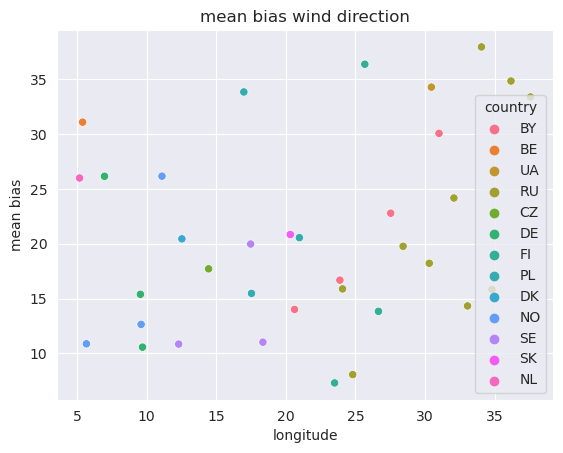

In [61]:
mean_bias_list = []
longitude = []
names = []


for file in os.listdir("/home/norah/master/data/wdir_int/int_sonde_data00_01/"):
    wdir_dist = []
    b = datetime64('1986-05-01T00:00:00.000000000')
    wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir_int/int_sonde_data00_01/"+file)


    file_list1=file.strip("_wdir_model.nc")
    file_list=file_list1.split("_")
    names.append(file_list[0])
    lat = float(file_list[2])
    long = float(file_list[3])

    Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_00_01_05_1986/"+file_list1+".txt", lat, long,b)
    Radiosonde1.find_horizontal_disp()
    
    #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

    #Radiosonde1.find_horizontal_disp()      
    wdir = wind_data["wdir_model"].values

    for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):

        phi = abs(w-r)%369

        if phi > 180:
            phi = 360-phi
            wdir_dist.append(phi)

        else:
            wdir_dist.append(phi)
        #print(w)
        #print(r)
        #print(phi)
    
    mean_bias = np.mean(wdir_dist)


    mean_bias_list.append(mean_bias)
    longitude.append(Radiosonde1.lon)

df = pd.DataFrame({"mean bias": mean_bias_list, "longitude":longitude, "country":names})
sns.set_style(style="darkgrid")
sns.scatterplot(data=df, x="longitude", y="mean bias", hue="country")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
  

plt.title("mean bias wind direction")

plt.show()

In [297]:
times_list=[]
time0 = datetime64('1986-04-25T12:00:00.000000000')

for i in range(0,26):

    times_list.append(time0)
    time0 = time0+np.timedelta64(12, 'h')

times_list=np.delete(times_list,17)

print(times_list)
string=np.datetime_as_string(times_list[0], unit='h')
#string=string.split("_")
#string=string.split("T")
print(string[5]+string[6])
print(string[8]+string[9])
print(string[11]+string[12])

stations_wspeed=["12425", "22522", "22845", "26298", "27037", "27612", "34009", "33317"]

stations_wdir=["10618", "10771", "34009", "34300", "11952","33345", "33393"]

['1986-04-25T12:00:00.000000000' '1986-04-26T00:00:00.000000000'
 '1986-04-26T12:00:00.000000000' '1986-04-27T00:00:00.000000000'
 '1986-04-27T12:00:00.000000000' '1986-04-28T00:00:00.000000000'
 '1986-04-28T12:00:00.000000000' '1986-04-29T00:00:00.000000000'
 '1986-04-29T12:00:00.000000000' '1986-04-30T00:00:00.000000000'
 '1986-04-30T12:00:00.000000000' '1986-05-01T00:00:00.000000000'
 '1986-05-01T12:00:00.000000000' '1986-05-02T00:00:00.000000000'
 '1986-05-02T12:00:00.000000000' '1986-05-03T00:00:00.000000000'
 '1986-05-03T12:00:00.000000000' '1986-05-04T12:00:00.000000000'
 '1986-05-05T00:00:00.000000000' '1986-05-05T12:00:00.000000000'
 '1986-05-06T00:00:00.000000000' '1986-05-06T12:00:00.000000000'
 '1986-05-07T00:00:00.000000000' '1986-05-07T12:00:00.000000000'
 '1986-05-08T00:00:00.000000000']
04
25
12


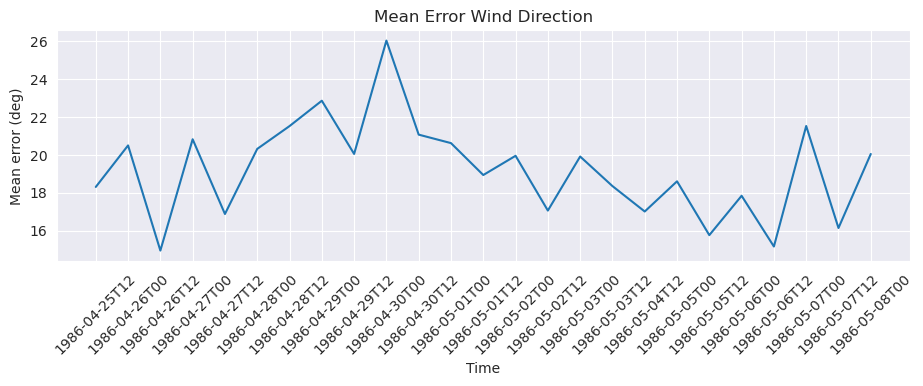

In [304]:
#Mean absolute bias for all timepoints
mean_bias_list = []
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]
speed_av=[]


for i,times in enumerate(times_list):

    wdir_dist = []
    string=np.datetime_as_string(times_list[i], unit='h')
    time_list2.append(string)
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    

    for file in os.listdir("/home/norah/master/data/wdir_int/int_sonde_data"+hour+"_"+day+"/"):
        radiosonde_files_wdir.append(file)
        wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir_int/int_sonde_data"+hour+"_"+day+"/"+file)
        file_list1=file.strip("_wdir_model.nc")
        wspeed_data=xarray.open_mfdataset("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file_list1+"_wspeed_model.nc")

        file_list1=file.strip("_wdir_model.nc")
        file_list=file_list1.split("_")
        names.append(file_list[0])
        lat = float(file_list[2])
        long = float(file_list[3])

        if file_list[1] not in stations_wdir:
            Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
            Radiosonde1.find_horizontal_disp()
    
            #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

            #Radiosonde1.find_horizontal_disp()      
          

            #wdir = wind_data["wdir_model"].values
            if i<1:
        
                wspeed = wspeed_data["wdir_model"].values
            else:
                wspeed = wspeed_data["wspeed_model"].values
            
            wdir = wind_data["wdir_model"].values   

            k=0
            for w, r in zip(wspeed, Radiosonde1.data["WSPD(knot)"]):
                upper=1000
                lower=10

                if upper>Radiosonde1.data["height(m)"][k]>lower:

                    phi = w

                    
                    speed_av.append(phi)
                k +=1
            av_speed= np.mean(speed_av)
            j=0
            
            if av_speed>2:
          
                for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):
                    upper=40000
                    lower=10
                    if upper>Radiosonde1.data["height(m)"][j]>lower:

                        phi = abs(w-r)%369

                        if phi > 180:
                            phi = 360-phi
                            wdir_dist.append(phi)

                        else:
                            wdir_dist.append(phi)
                    j +=1
    if len(wdir_dist)!=0:

        mean_bias = np.mean(wdir_dist)
 
        mean_bias_list.append(mean_bias)
        longitude.append(Radiosonde1.lon)

fig = plt.figure(figsize=[11,3])
df = pd.DataFrame({"Mean error (deg)": mean_bias_list, "Time":time_list2})
sns.set_style(style="darkgrid")
sns.lineplot(data=df, x="Time", y="Mean error (deg)")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
all_sonde_files=np.unique(radiosonde_files_wdir)
#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Error Wind Direction")
plt.xticks(rotation=45)
plt.show()

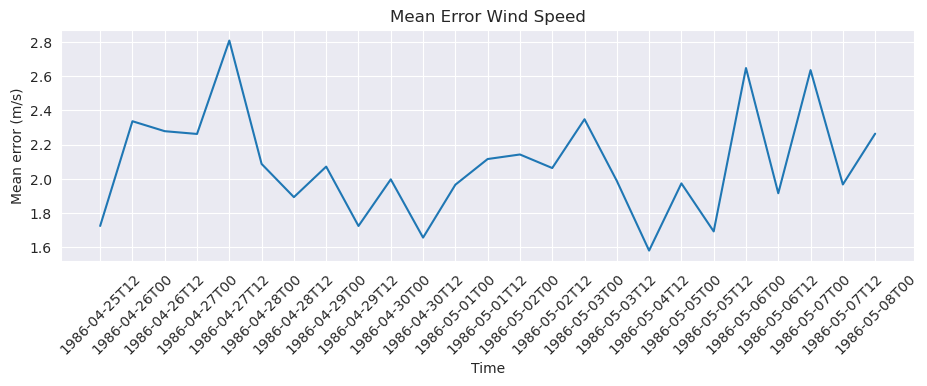

In [288]:
#Mean absolute bias for all timepoints
mean_bias_list = []
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]


for i,times in enumerate(times_list):

    wdir_dist = []
    wdir_dist = []
    string=np.datetime_as_string(times_list[i], unit='h')
    time_list2.append(string)
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    

    for file in os.listdir("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"):
        radiosonde_files_wdir.append(file)
        #b = datetime64('1986-05-01T00:00:00.000000000')
        wind_data=xarray.open_mfdataset("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file)
        speed_av = []

        file_list1=file.strip("_wspeed_model.nc")
        file_list=file_list1.split("_")
        names.append(file_list[0])
        lat = float(file_list[2])
        long = float(file_list[3])

        if file_list[1] not in stations_wspeed:

            Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
            Radiosonde1.find_horizontal_disp()
    
            #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

            #Radiosonde1.find_horizontal_disp()      
            if i<1:
        
                wdir = wind_data["wdir_model"].values

            else:
              
                wdir = wind_data["wspeed_model"].values 
            
            k=0
            for w, r in zip(wdir, Radiosonde1.data["WSPD(knot)"]):
                upper=1000
                lower=10

                if upper>Radiosonde1.data["height(m)"][k]>lower:

                    phi = w

                    
                    speed_av.append(phi)
                k +=1
            av_speed= np.mean(speed_av)
            j=0
            
            if av_speed>2:
                for w, r in zip(wdir, Radiosonde1.data["WSPD(knot)"]):

                    upper=40000
                    lower=10
                    if upper>Radiosonde1.data["height(m)"][j]>lower:

                        phi = abs(w-r)

       
                        wdir_dist.append(phi)
                    j +=1


    if len(wdir_dist)!=0:

        mean_bias = np.mean(wdir_dist)

        mean_bias_list.append(mean_bias)
        longitude.append(Radiosonde1.lon)

fig = plt.figure(figsize=[11,3])
df = pd.DataFrame({"Mean error (m/s)": mean_bias_list, "Time":time_list2})
sns.set_style(style="darkgrid")
sns.lineplot(data=df, x="Time", y="Mean error (m/s)")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
all_sonde_files=np.unique(radiosonde_files_wdir)

#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Error Wind Speed")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_4000893/273739734.py:59: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  first_q = df.quantile(0.25)['Mean Error (deg)']
/tmp/ipykernel_4000893/273739734.py:60: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  third_q = df.quantile(0.75)['Mean Error (deg)']
/tmp/ipykernel_4000893/273739734.py:86: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_q1 = df.groupby(df.index).quantile(0.25)['Mean Error (deg)'].to_numpy()
/tmp/ipykernel_40

-11.368707474207168
3
blabla
30.137525356623968
blabla
BY_33041


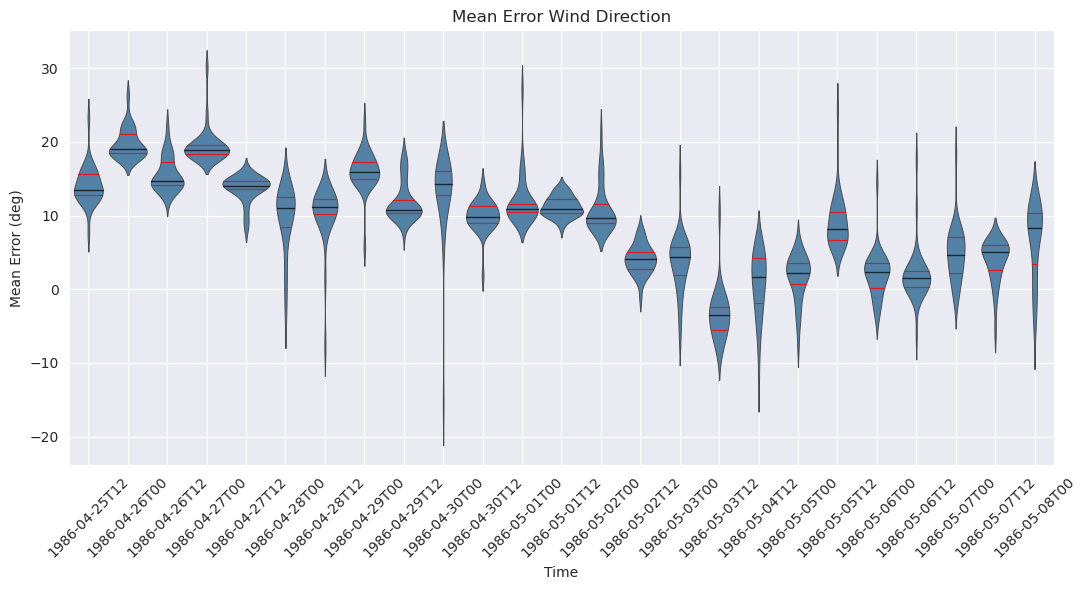

In [176]:
#Mean absolute bias for all timepoints
mean_bias_list = []
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]


for i,times in enumerate(times_list):

    wdir_dist = []
    string=np.datetime_as_string(times_list[i], unit='h')
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    

    for file in os.listdir("/home/norah/master/data/wdir_int/int_sonde_data"+hour+"_"+day+"/"):
        radiosonde_files_wdir.append(file)
        #b = datetime64('1986-05-01T00:00:00.000000000')
        wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir_int/int_sonde_data"+hour+"_"+day+"/"+file)


        file_list1=file.strip("_wdir_model.nc")
        file_list=file_list1.split("_")
        names.append(file_list[0]+"_"+file_list[1])
        lat = float(file_list[2])
        long = float(file_list[3])

        Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
        Radiosonde1.find_horizontal_disp()
    
        #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

        #Radiosonde1.find_horizontal_disp()      
        wdir = wind_data["wdir_model"].values
        i=0
        for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):
            upper=40000
            lower=0
            if upper>Radiosonde1.data["height(m)"][i]>lower:

                phi = abs(w-r)%369

                if phi > 180:
                    phi = 360-phi
                    wdir_dist.append(-phi)

                else:
                    wdir_dist.append(phi)
            i +=1
    
        mean_bias = np.mean(wdir_dist)

        mean_bias_list.append(mean_bias)
        time_list2.append(string)
#Finding the IQR benchmark for all timesteps and radisondes
df = pd.DataFrame({"Mean Error (deg)": mean_bias_list, "Time":time_list2, "Station": names})

first_q = df.quantile(0.25)['Mean Error (deg)']
third_q = df.quantile(0.75)['Mean Error (deg)']
outlier_all_lim_top = third_q + 1.5 * (third_q - first_q) #interquartile range
outlier_all_lim = first_q - 1.5 * (third_q - first_q)
print(outlier_all_lim)

fig = plt.figure(figsize=[11,6])
df = pd.DataFrame({"Mean Error (deg)": mean_bias_list, "Time":time_list2, "Station": names})
sns.set_style(style="darkgrid")
df.set_index('Time', inplace=True)
boxplot = sns.violinplot(x=df.index, y=df['Mean Error (deg)'], inner="quartile", color="steelblue", linewidth=0.7, width=1.2)
for l in boxplot.lines:
    l.set_linestyle('-')
    l.set_linewidth(0.8)
    l.set_color('red')
    l.set_alpha(0.8)

for l in boxplot.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(1)
    l.set_color('black')
    l.set_alpha(0.7)


upper_bound=[outlier_all_lim]*len(np.unique(time_list2))
#sns.lineplot(x=np.unique(time_list2), y=upper_bound)

month_q1 = df.groupby(df.index).quantile(0.25)['Mean Error (deg)'].to_numpy()
month_q3 = df.groupby(df.index).quantile(0.75)['Mean Error (deg)'].to_numpy()
outlier_top_lim = month_q3 + 1.5 * (month_q3 - month_q1) #interquartile range
outlier_bottom_lim = month_q1 - 1.5 * (month_q3 - month_q1)
df_lim=pd.DataFrame({"lim_top":outlier_top_lim, "lim_bottom":outlier_bottom_lim, "date":np.unique(time_list2)})

i=0
for row in df.itertuples():
    date = row[0]
    i+=1
    val = row[1]
    lim_index=np.where(df_lim["date"]==date)[0][0]

    #if val > df_lim["lim_top"][lim_index] or val < df_lim["lim_bottom"][lim_index]:
    if val > 28 or val <-23:
    
        #plt.text(lim_index,df_lim["lim_top"][lim_index], "<--", ha='left', va='baseline', rotation=50, fontsize=11)
   
        print(lim_index)
        print("blabla")
              
        print(val)
              
        print("blabla")
        print(row[2])


#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Error Wind Direction")
plt.xticks(rotation=45)
plt.grid(axis="x") 
fig.tight_layout()
plt.show()

/tmp/ipykernel_3390750/1102788824.py:69: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  first_q = df.quantile(0.25)['Mean Error (m/s)']
/tmp/ipykernel_3390750/1102788824.py:70: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  third_q = df.quantile(0.75)['Mean Error (m/s)']
/tmp/ipykernel_3390750/1102788824.py:97: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_q1 = df.groupby(df.index).quantile(0.25)['Mean Error (m/s)'].to_numpy()
/tmp/ipykernel

-1.2552821161349812
15
blabla
3.3167993946530054
blabla
RU_34009
16
blabla
3.736300946967023
blabla
RU_34009
20
blabla
3.843539709118589
blabla
RU_34009
22
blabla
3.001715458941897
blabla
DE_10200


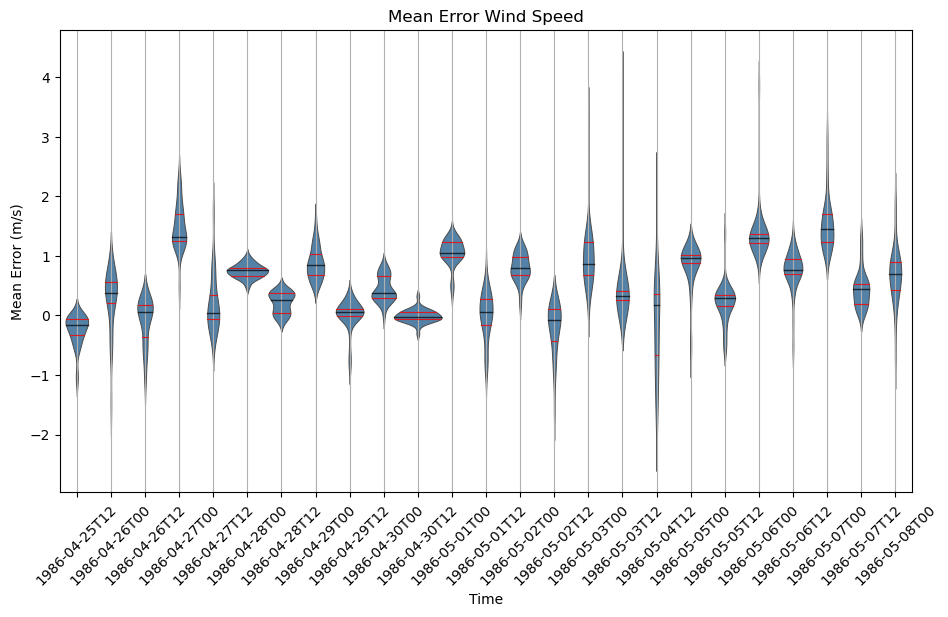

In [15]:
#Mean absolute bias for all timepoints
mean_bias_list = []
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]
av_data=[]

for i,times in enumerate(times_list):

    wdir_dist = []
    string=np.datetime_as_string(times_list[i], unit='h')
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    
   
    for k, file in enumerate(os.listdir("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/")):
      
        radiosonde_files_wdir.append(file)
        #b = datetime64('1986-05-01T00:00:00.000000000')
        wind_data=xarray.open_mfdataset("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file)


        file_list1=file.strip("_wspeed_model.nc")
        file_list=file_list1.split("_")
        names.append(file_list[0]+"_"+file_list[1])
        lat = float(file_list[2])
        long = float(file_list[3])

        Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
        Radiosonde1.find_horizontal_disp()
    
        #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

        if i<1 or 1<i<5:
         
            wdir = wind_data["wdir_model"].values

        else:
            wdir = wind_data["wspeed_model"].values   

     
        j=0
        for w, r in zip(wdir, Radiosonde1.data["WSPD(knot)"]):
            upper=5000
            lower=0
            if upper>Radiosonde1.data["height(m)"][j]>lower:
           

                phi = w-r

                    #if phi > 180:
                        #phi = 360-phi
                        #wdir_dist.append(phi)

                    #else:
                wdir_dist.append(phi)
            j +=1
    
        mean_bias = np.mean(wdir_dist)
        av_data.append(Radiosonde1.data["height(m)"][j-1])
        mean_bias_list.append(mean_bias)
        time_list2.append(string)


#Finding the IQR benchmark for all timesteps and radisondes
df = pd.DataFrame({"Mean Error (m/s)": mean_bias_list, "Time":time_list2, "Station": names, "Highest measurement": av_data})
#df = pd.DataFrame({"Mean Error (m/s)": mean_bias_list, "Time":time_list2})
first_q = df.quantile(0.25)['Mean Error (m/s)']
third_q = df.quantile(0.75)['Mean Error (m/s)']
outlier_all_lim = third_q + 1.5 * (third_q - first_q) #interquartile range
outlier_all_lim_bottom = first_q - 1.5 * (third_q - first_q)
print(outlier_all_lim_bottom)
fig = plt.figure(figsize=[11,6])
# df = pd.DataFrame({"Mean Bias (deg)": mean_bias_list, "Time":time_list2, "Station": names})
#sns.set_style(style="darkgrid")
df.set_index('Time', inplace=True)
boxplot = sns.violinplot(x=df.index, y=df['Mean Error (m/s)'], inner="quartile", color="steelblue", linewidth=0.7, width=1.4)
for l in boxplot.lines:
    l.set_linestyle('-')
    l.set_linewidth(0.8)
    l.set_color('red')
    l.set_alpha(0.8)

for l in boxplot.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(1)
    l.set_color('black')
    l.set_alpha(0.7)

#plt.violinplot(df, showmedians=True)
#violin=plt.violinplot(np.unique(df.index),df["Mean Error (m/s)"].groupby(df.index))

upper_bound=[outlier_all_lim]*len(np.unique(time_list2))
#sns.lineplot(x=np.unique(time_list2), y=upper_bound)

month_q1 = df.groupby(df.index).quantile(0.25)['Mean Error (m/s)'].to_numpy()
month_q3 = df.groupby(df.index).quantile(0.75)['Mean Error (m/s)'].to_numpy()
outlier_top_lim = month_q3 + 1.5 * (month_q3 - month_q1) #interquartile range
outlier_bottom_lim = month_q1 - 1.5 * (month_q3 - month_q1)
df_lim=pd.DataFrame({"lim":outlier_top_lim, "date":np.unique(time_list2)})

i=0
outliers=[]
outliers_name=[]

for row in df.itertuples():
    date = row[0]
    i+=1
    val = row[1]
    lim_index=np.where(df_lim["date"]==date)[0][0]

    if val >3 or val < -2:
    
        #plt.text(lim_index,df_lim["lim_top"][lim_index], "<--", ha='left', va='baseline', rotation=50, fontsize=11)
   
        print(lim_index)
        print("blabla")
              
        print(val)
              
        print("blabla")
        print(row[2])
       

#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Error Wind Speed")
plt.xticks(rotation=45)
plt.grid(axis="x") 

plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'BE_6476'),
  Text(1, 0, 'BY_26629'),
  Text(2, 0, 'BY_26702'),
  Text(3, 0, 'BY_26850'),
  Text(4, 0, 'BY_33008'),
  Text(5, 0, 'BY_33041'),
  Text(6, 0, 'CZ_11520'),
  Text(7, 0, 'DE_10035'),
  Text(8, 0, 'DE_10200'),
  Text(9, 0, 'DE_10238'),
  Text(10, 0, 'DE_10304'),
  Text(11, 0, 'DE_10338'),
  Text(12, 0, 'DE_10410'),
  Text(13, 0, 'DE_10437'),
  Text(14, 0, 'DE_10618'),
  Text(15, 0, 'DE_10771'),
  Text(16, 0, 'DK_6181'),
  Text(17, 0, 'FI_2836'),
  Text(18, 0, 'FI_2935'),
  Text(19, 0, 'FI_2963'),
  Text(20, 0, 'NL_6260'),
  Text(21, 0, 'NO_1152'),
  Text(22, 0, 'NO_1241'),
  Text(23, 0, 'NO_1384'),
  Text(24, 0, 'NO_1415'),
  Text(25, 0, 'PL_12120'),
  Text(26, 0, 'PL_123

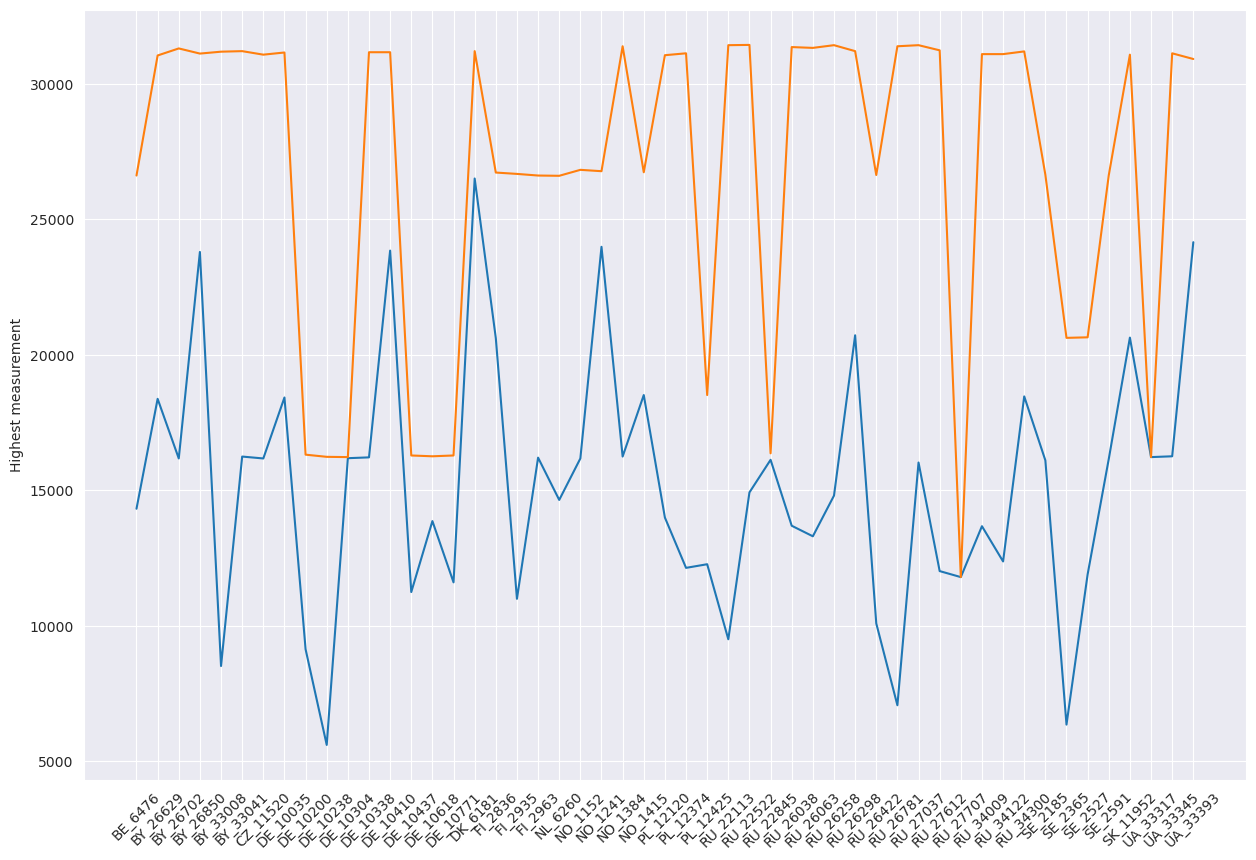

In [5]:
y=df.groupby("Station")['Highest measurement'].min()
y2=df.groupby("Station")['Highest measurement'].max()
fig = plt.figure(figsize=[15,10])
sns.lineplot(x=np.unique(df["Station"]), y=y)
sns.lineplot(x=np.unique(df["Station"]), y=y2)
plt.xticks(rotation=45)

In [284]:
stations_wspeed=["12425", "22522", "22845", "26298", "27037", "27612", "34009", "33317"]

stations_wdir=["10618", "10771", "34009", "34300", "11952","33345", "33393"]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


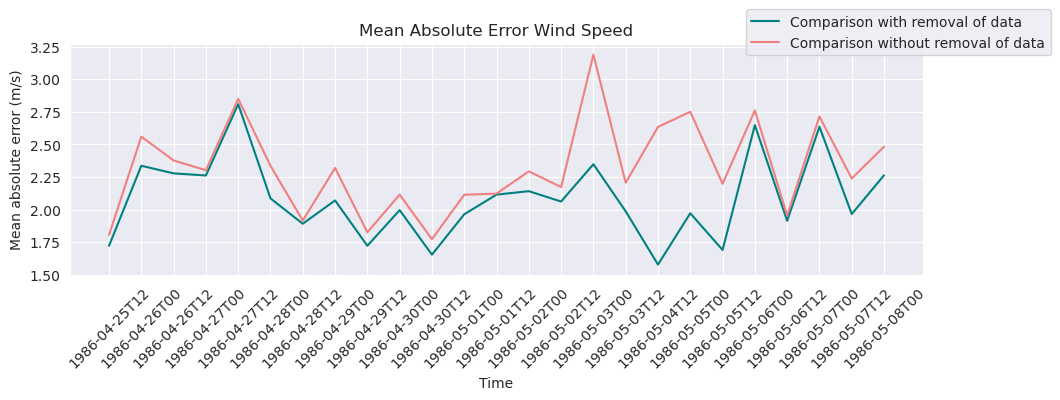

In [292]:
no_mean_bias_list = []
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]


for i,times in enumerate(times_list):

    wdir_dist = []
    string=np.datetime_as_string(times_list[i], unit='h')
    time_list2.append(string)
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    
  
    for file in os.listdir("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"):
        radiosonde_files_wdir.append(file)
        #b = datetime64('1986-05-01T00:00:00.000000000')
        wind_data=xarray.open_mfdataset("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file)


        file_list1=file.strip("_wspeed_model.nc")
        file_list=file_list1.split("_")
        names.append(file_list[0])
        lat = float(file_list[2])
        long = float(file_list[3])


        #if file_list[1] not in stations_wspeed:

        Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
        Radiosonde1.find_horizontal_disp()
    
            #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

            #Radiosonde1.find_horizontal_disp()      
        if i<1:
         
            wdir = wind_data["wdir_model"].values

        else:
            wdir = wind_data["wspeed_model"].values   

        k=0
        for w, r in zip(wdir, Radiosonde1.data["WSPD(knot)"]):
            upper=1000
            lower=10

            if upper>Radiosonde1.data["height(m)"][k]>lower:

                phi = w

                    
                speed_av.append(phi)
            k +=1
        av_speed= np.mean(speed_av)
        j=0
            
        if av_speed>0:
            for w, r in zip(wdir, Radiosonde1.data["WSPD(knot)"]):

                upper=40000
                lower=10
                if upper>Radiosonde1.data["height(m)"][j]>lower:

                    phi = abs(w-r)

       
                    wdir_dist.append(phi)
                j +=1

    
    if len(wdir_dist)!=0:

        no_mean_bias = np.mean(wdir_dist)
 
        no_mean_bias_list.append(no_mean_bias)
        longitude.append(Radiosonde1.lon)
 
fig = plt.figure(figsize=[11,3])
df1 = pd.DataFrame({"Mean absolute error (m/s)": mean_bias_list, "Time":time_list2})
df2 = pd.DataFrame({"Mean absolute error (m/s)": no_mean_bias_list, "Time":time_list2})
sns.set_style(style="darkgrid")
sns.lineplot(data=df1, x="Time", y="Mean absolute error (m/s)", color="teal")
sns.lineplot(data=df2, x="Time", y="Mean absolute error (m/s)", color="lightcoral")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
all_sonde_files=np.unique(radiosonde_files_wdir)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Absolute Error Wind Speed")
plt.xticks(rotation=45)
plt.legend(labels=["Comparison with removal of data", "Comparison without removal of data"], bbox_to_anchor=(1.15, 1.15), loc='upper right', borderaxespad=0)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


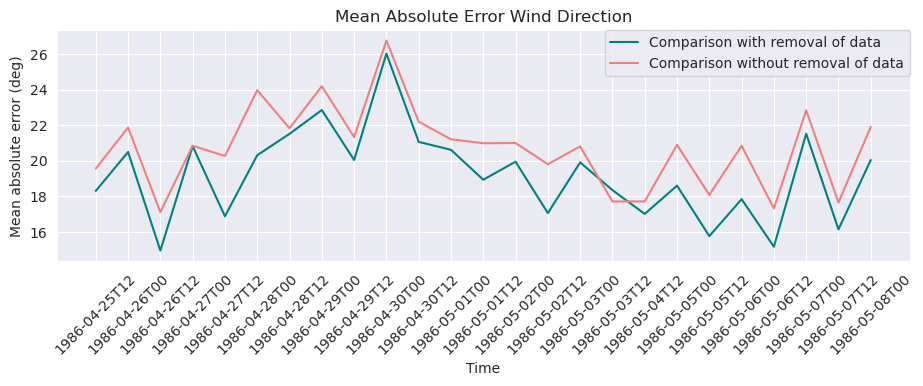

In [308]:
no_mean_bias_list = []
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]
speed_av=[]


for i,times in enumerate(times_list):

    wdir_dist = []
    string=np.datetime_as_string(times_list[i], unit='h')
    time_list2.append(string)
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    

    for file in os.listdir("/home/norah/master/data/no_hdisp_wdir_int/int_sonde_data"+hour+"_"+day+"/"):
        radiosonde_files_wdir.append(file)
        #b = datetime64('1986-05-01T00:00:00.000000000')
        wind_data=xarray.open_mfdataset("/home/norah/master/data/no_hdisp_wdir_int/int_sonde_data"+hour+"_"+day+"/"+file)
        file_list1=file.strip("_wdir_model.nc")
        wspeed_data=xarray.open_mfdataset("/home/norah/master/data/no_hdisp_wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file_list1+"_wspeed_model.nc")

        file_list1=file.strip("_wdir_model.nc")
        file_list=file_list1.split("_")
        names.append(file_list[0])
        lat = float(file_list[2])
        long = float(file_list[3])

        if times in times_list:
            Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
            Radiosonde1.find_data_no_horizontal_disp()
    
            #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

            #Radiosonde1.find_horizontal_disp()      
          
         
            #wdir = wind_data["wdir_model"].values

            #else:
            wspeed = wspeed_data["wspeed_model"].values
            wdir = wind_data["wdir_model"].values   

            k=0
            for w, r in zip(wspeed, Radiosonde1.data["WSPD(knot)"]):
                upper=1000
                lower=10

                if upper>Radiosonde1.data["height(m)"][k]>lower:

                    phi = w

                    
                    speed_av.append(phi)
                k +=1
            av_speed= np.mean(speed_av)
            j=0
            
            if av_speed>0:
          
                for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):
                    upper=40000
                    lower=10
                    if upper>Radiosonde1.data["height(m)"][j]>lower:

                        phi = abs(w-r)%369

                        if phi > 180:
                            phi = 360-phi
                            wdir_dist.append(phi)

                        else:
                            wdir_dist.append(phi)
                    j +=1
    if len(wdir_dist)!=0:

        no_mean_bias = np.mean(wdir_dist)
 
        no_mean_bias_list.append(no_mean_bias)
        longitude.append(Radiosonde1.lon)


fig = plt.figure(figsize=[11,3])
df1 = pd.DataFrame({"Mean absolute error (deg)": mean_bias_list, "Time":time_list2})
df2 = pd.DataFrame({"Mean absolute error (deg)": no_mean_bias_list, "Time":time_list2})
sns.set_style(style="darkgrid")
sns.lineplot(data=df1, x="Time", y="Mean absolute error (deg)", color="teal")
sns.lineplot(data=df2, x="Time", y="Mean absolute error (deg)", color="lightcoral")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
all_sonde_files=np.unique(radiosonde_files_wdir)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Absolute Error Wind Direction")
plt.xticks(rotation=45)
plt.legend(labels=["Comparison with removal of data", "Comparison without removal of data"], bbox_to_anchor=(1.0, 1.0), loc='upper right', borderaxespad=0)
plt.show()

100%|██████████| 50/50 [11:14<00:00, 13.50s/it]


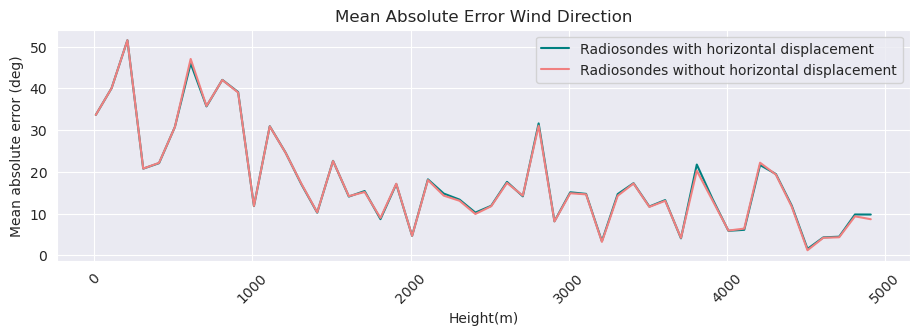

In [18]:
#Mean absolute bias for all timepoints for height with binning
no_mean_bias_list = []
mean_bias_list = []
height_bin = []
height_bin2=[]
names = []
time_list2=[]

bin_list = np.arange(10,5000,100)

for k in tqdm(bin_list):
    
    for i,times in enumerate(times_list):

        wdir_dist = []
        string=np.datetime_as_string(times_list[i], unit='h')
        time_list2.append(string)
        month=string[5]+string[6]
        day=string[8]+string[9]
        hour=string[11]+string[12]    

        for file in os.listdir("/home/norah/master/data/wdir_int/int_sonde_data"+hour+"_"+day+"/"):

            #b = datetime64('1986-05-01T00:00:00.000000000')
            wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir_int/int_sonde_data"+hour+"_"+day+"/"+file)


            file_list1=file.strip("_wdir_model.nc")
            file_list=file_list1.split("_")
            names.append(file_list[0])
            lat = float(file_list[2])
            long = float(file_list[3])

            Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
            Radiosonde1.find_horizontal_disp()
    
            #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

            #Radiosonde1.find_horizontal_disp()      
            wdir = wind_data["wdir_model"].values
            i=0
            for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):
                upper=k+100
                lower=k
                if upper>Radiosonde1.data["height(m)"][i]>lower:

                    phi = abs(w-r)%369

                    if phi > 180:
                        phi = 360-phi
                        wdir_dist.append(phi)

                    else:
                        wdir_dist.append(phi)
                i +=1
    
    mean_bias = np.mean(wdir_dist)

    mean_bias_list.append(mean_bias)
    height_bin.append(k)

for k in tqdm(bin_list):
    
    for i,times in enumerate(times_list):

        wdir_dist = []
        string=np.datetime_as_string(times_list[i], unit='h')
        time_list2.append(string)
        month=string[5]+string[6]
        day=string[8]+string[9]
        hour=string[11]+string[12]    

        for file in os.listdir("/home/norah/master/data/no_hdisp_wdir_int/int_sonde_data"+hour+"_"+day+"/"):

            #b = datetime64('1986-05-01T00:00:00.000000000')
            wind_data=xarray.open_mfdataset("/home/norah/master/data/no_hdisp_wdir_int/int_sonde_data"+hour+"_"+day+"/"+file)


            file_list1=file.strip("_wdir_model.nc")
            file_list=file_list1.split("_")
            names.append(file_list[0])
            lat = float(file_list[2])
            long = float(file_list[3])

            Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
            Radiosonde1.find_horizontal_disp()
    
            #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

            #Radiosonde1.find_horizontal_disp()      
            wdir = wind_data["wdir_model"].values
            i=0
            for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):
                upper=k+100
                lower=k
                if upper>Radiosonde1.data["height(m)"][i]>lower:

                    phi = abs(w-r)%369

                    if phi > 180:
                        phi = 360-phi
                        wdir_dist.append(phi)

                    else:
                        wdir_dist.append(phi)
                i +=1
    
    mean_bias = np.mean(wdir_dist)

    no_mean_bias_list.append(mean_bias)
    height_bin2.append(k)

fig = plt.figure(figsize=[11,3])
df = pd.DataFrame({"Mean absolute error (deg)": mean_bias_list, "Height(m)":height_bin})
df2 = pd.DataFrame({"Mean absolute error (deg)": no_mean_bias_list, "Height(m)":height_bin2})
sns.set_style(style="darkgrid")
sns.lineplot(data=df, x="Height(m)", y="Mean absolute error (deg)", color="teal")
sns.lineplot(data=df2, x="Height(m)", y="Mean absolute error (deg)", color="lightcoral")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")

#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")


plt.legend(labels=["Radiosondes with horizontal displacement", "Radiosondes without horizontal displacement"])

plt.title(f"Mean Absolute Error Wind Direction")
plt.xticks(rotation=45)
plt.show()

In [16]:
df

,Mean error (deg),Height(m)
0,32.989745,10
1,25.836721,110
2,51.509474,210
3,20.751351,310
4,11.086737,410
5,30.718483,510
6,45.964375,610
7,19.996782,710
8,42.017722,810
9,39.097572,910


In [319]:
#Mean absolute bias for all timepoints for height with binning
no_mean_bias_list = []
mean_bias_list = []
height_bin = []
names = []
time_list2=[]

bin_list = np.arange(10,5000,500)

for k in tqdm(bin_list):
    
    wdir_dist = []
    
    for i,times in enumerate(times_list):
    
        string=np.datetime_as_string(times_list[i], unit='h')
        time_list2.append(string)
        month=string[5]+string[6]
        day=string[8]+string[9]
        hour=string[11]+string[12]    

        for file in os.listdir("/home/norah/master/data/no_hdisp_wdir_int/int_sonde_data"+hour+"_"+day+"/"):

        #b = datetime64('1986-05-01T00:00:00.000000000')
            wind_data=xarray.open_mfdataset("/home/norah/master/data/no_hdisp_wdir_int/int_sonde_data"+hour+"_"+day+"/"+file)
            file_list1=file.strip("_wdir_model.nc")
            wspeed_data=xarray.open_mfdataset("/home/norah/master/data/no_hdisp_wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file_list1+"_wspeed_model.nc")

            file_list1=file.strip("_wdir_model.nc")
            file_list=file_list1.split("_")
            names.append(file_list[0])
            lat = float(file_list[2])
            long = float(file_list[3])

            if file_list[1] not in stations_wdir:
                Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
                Radiosonde1.find_data_no_horizontal_disp()
    
            #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

            #Radiosonde1.find_horizontal_disp()      
          
         
            #wdir = wind_data["wdir_model"].values

            #else:
                wspeed = wspeed_data["wspeed_model"].values
                wdir = wind_data["wdir_model"].values   

                b=0
                for w, r in zip(wspeed, Radiosonde1.data["WSPD(knot)"]):
                    upper=1000
                    lower=10

                    if upper>Radiosonde1.data["height(m)"][b]>lower:

                        phi = w

                    
                        speed_av.append(phi)
                    b +=1
                av_speed= np.mean(speed_av)
                j=0
            
                if av_speed>2:
          
                    for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):
                        upper=k+500
                        lower=k
                        if upper>Radiosonde1.data["height(m)"][j]>lower:

                            phi = abs(w-r)%369

                            if phi > 180:
                                phi = 360-phi
                                wdir_dist.append(phi)

                            else:
                                wdir_dist.append(phi)
                        j +=1

    
    mean_bias = np.mean(wdir_dist)

    no_mean_bias_list.append(mean_bias)


for k in tqdm(bin_list):
    
    wdir_dist = []
    
    for i,times in enumerate(times_list):
    
        string=np.datetime_as_string(times_list[i], unit='h')
        time_list2.append(string)
        month=string[5]+string[6]
        day=string[8]+string[9]
        hour=string[11]+string[12]    

        for file in os.listdir("/home/norah/master/data/wdir_int/int_sonde_data"+hour+"_"+day+"/"):

        #b = datetime64('1986-05-01T00:00:00.000000000')
            wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir_int/int_sonde_data"+hour+"_"+day+"/"+file)
            file_list1=file.strip("_wdir_model.nc")
            wspeed_data=xarray.open_mfdataset("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file_list1+"_wspeed_model.nc")

            file_list1=file.strip("_wdir_model.nc")
            file_list=file_list1.split("_")
            names.append(file_list[0])
            lat = float(file_list[2])
            long = float(file_list[3])

            if file_list[1] not in stations_wdir:
                Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
                Radiosonde1.find_horizontal_disp()
    
            #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

            #Radiosonde1.find_horizontal_disp()      
          
         
            #wdir = wind_data["wdir_model"].values
                if i<1:
         
                    wspeed = wspeed_data["wdir_model"].values
                else:
                    wspeed = wspeed_data["wspeed_model"].values
                wdir = wind_data["wdir_model"].values   

                b=0
                for w, r in zip(wspeed, Radiosonde1.data["WSPD(knot)"]):
                    upper=1000
                    lower=10

                    if upper>Radiosonde1.data["height(m)"][b]>lower:

                        phi = w

                    
                        speed_av.append(phi)
                    b +=1
                av_speed= np.mean(speed_av)
                j=0
            
                if av_speed>2:
          
                    for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):
                        upper=k+500
                        lower=k
                        if upper>Radiosonde1.data["height(m)"][j]>lower:

                            phi = abs(w-r)%369

                            if phi > 180:
                                phi = 360-phi
                                wdir_dist.append(phi)

                            else:
                                wdir_dist.append(phi)
                        j +=1

    mean_bias = np.mean(wdir_dist)

    mean_bias_list.append(mean_bias)
    height_bin.append(k+500/2)

fig = plt.figure(figsize=[11,3])
df2 = pd.DataFrame({"Mean absolute error (deg)": no_mean_bias_list, "Height(m)":height_bin})
df = pd.DataFrame({"Mean absolute error (deg)": mean_bias_list, "Height(m)":height_bin})
sns.set_style(style="darkgrid")
sns.lineplot(data=df, x="Height(m)", y="Mean absolute error (deg)", color="teal", marker="o")
sns.lineplot(data=df2, x="Height(m)", y="Mean absolute error (deg)", color="lightcoral", marker="o")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
  
plt.legend(labels=["Radiosondes with horizontal displacment", "Radiosondes without horizontal displacment"])
plt.title(f"Mean Absolute Error Wind Direction")
plt.xticks(rotation=45)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

 23%|██▎       | 14/60 [03:07<09:34, 12.48s/it]/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 53%|█████▎    | 32/60 [06:51<05:45, 12.36s/it]/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 87%|████████▋ | 52/60 [10:56<01:38, 12.29s/it]/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slic

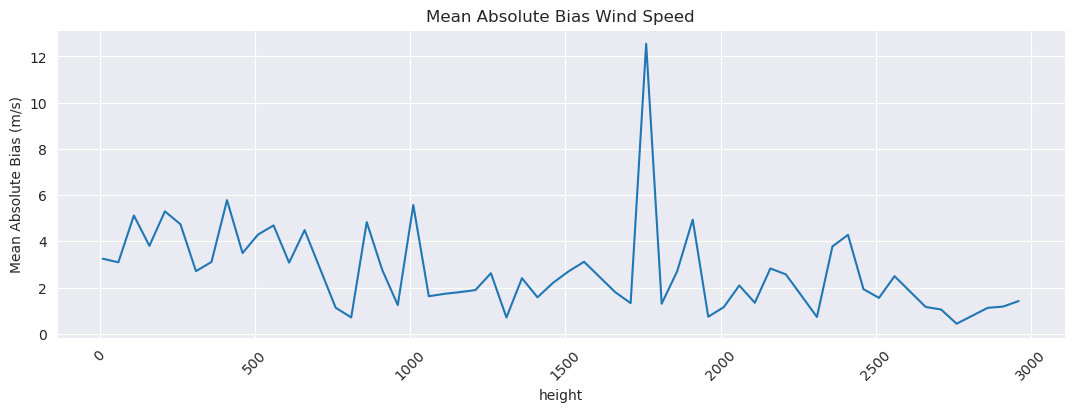

In [34]:
#Mean absolute bias wind speed for all timepoints for height with binning
mean_bias_list = []
height_bin = []
names = []
time_list2=[]

bin_list = np.arange(10,3000,50)

for k in tqdm(bin_list):
    
    for i,times in enumerate(times_list):

        wdir_dist = []
        string=np.datetime_as_string(times_list[i], unit='h')
        time_list2.append(string)
        month=string[5]+string[6]
        day=string[8]+string[9]
        hour=string[11]+string[12]    

        for file in os.listdir("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"):

            #b = datetime64('1986-05-01T00:00:00.000000000')
            wind_data=xarray.open_mfdataset("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file)


            file_list1=file.strip("_wspeed_model.nc")
            file_list=file_list1.split("_")
            names.append(file_list[0])
            lat = float(file_list[2])
            long = float(file_list[3])

            Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
            Radiosonde1.find_horizontal_disp()
    
            #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

            #Radiosonde1.find_horizontal_disp()  
            if i<5:

                wdir = wind_data["wdir_model"].values

            else:
                wdir = wind_data["wspeed_model"].values   

     
            j=0
            for w, r in zip(wdir, Radiosonde1.data["WSPD(knot)"]):
                upper=k+50
                lower=k
                if upper>Radiosonde1.data["height(m)"][j]>lower:

                    phi = abs(w-r)

                    #if phi > 180:
                        #phi = 360-phi
                        #wdir_dist.append(phi)

                    #else:
                    wdir_dist.append(phi)
                j +=1
    
    mean_bias = np.mean(wdir_dist)

    mean_bias_list.append(mean_bias)
    height_bin.append(k)

fig = plt.figure(figsize=[13,4])
df = pd.DataFrame({"Mean Absolute Bias (m/s)": mean_bias_list, "height":height_bin})
sns.set_style(style="darkgrid")
sns.lineplot(data=df, x="height", y="Mean Absolute Bias (m/s)")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
  

plt.title(f"Mean Absolute Bias Wind Speed")
plt.xticks(rotation=45)
plt.show()

PL12425
3.4487887946545226
RU22522
5.052382472678731
RU22845
3.4530300385288686
RU26298
5.231283430935831
RU27037
4.093475591122709
RU27612
3.158294427812104
RU34009
4.16650957523114
UA33317
6.00978621707408


/tmp/ipykernel_4000893/2402434487.py:93: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  first_q = df.quantile(0.25)['mean absolute error (deg)']
/tmp/ipykernel_4000893/2402434487.py:94: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  third_q = df.quantile(0.75)['mean absolute error (deg)']


3.854694108803537


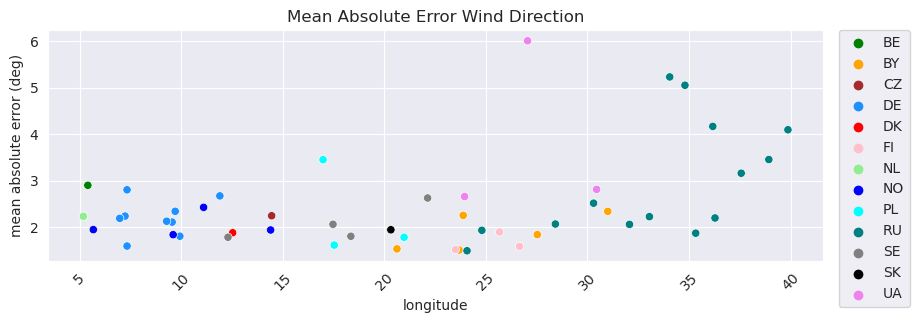

In [252]:
#Mean absolute bias
mean_bias_list = []
longitude = []
names = []
time_list2=[]


    
#for file1 in os.listdir("/home/norah/master/data/wdir_int/int_sonde_data00_26/"):
for file1 in all_sonde_files:


    wdir_dist = []   
    
    for times in times_list:
  
        string=np.datetime_as_string(times, unit='h')
        time_list2.append(string)
        month=string[5]+string[6]
        day=string[8]+string[9]
        hour=string[11]+string[12] 

        
        if os.path.isfile("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file1) is True:

        
            wind_data=xarray.open_mfdataset("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file1)

            file_list1=file1.strip("_wspeed_model.nc")
            file_list=file_list1.split("_")
            lat = float(file_list[2])
            long = float(file_list[3])

            Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
            Radiosonde1.find_horizontal_disp()
    
            if "wdir_model" in wind_data:
         
                wdir = wind_data["wdir_model"].values

            else:
                wdir = wind_data["wspeed_model"].values  

            k=0
            for w, r in zip(wdir, Radiosonde1.data["WSPD(knot)"]):
                upper=1000
                lower=10

                if upper>Radiosonde1.data["height(m)"][k]>lower:

                    phi = w

                    
                    speed_av.append(phi)
                k +=1
            av_speed= np.mean(speed_av)
            j=0
            
            if av_speed>2:
                for w, r in zip(wdir, Radiosonde1.data["WSPD(knot)"]):

                    upper=40000
                    lower=10
                    if upper>Radiosonde1.data["height(m)"][j]>lower:

                        phi = abs(w-r)

       
                        wdir_dist.append(phi)
                    j +=1


    longitude.append(Radiosonde1.lon)
    names.append(file_list[0])
    mean_bias = np.mean(wdir_dist)
    if mean_bias > 3:
        print(file_list[0]+file_list[1])
        print(mean_bias)
    mean_bias_list.append(mean_bias)

#rint(mean_bias_list)
#print(names)

     

colors = ['green','orange','brown','dodgerblue','red', "pink", "lightgreen", "blue", "cyan", "teal", "grey", "black", "violet"]
contries =[]
fig = plt.figure(figsize=[10,3])
df = pd.DataFrame({"mean absolute error (deg)": mean_bias_list, "longitude":longitude, "station names": names})
sns.set_style(style="darkgrid")
sns.scatterplot(data=df, x="longitude", y="mean absolute error (deg)", hue="station names", palette=colors)

first_q = df.quantile(0.25)['mean absolute error (deg)']
third_q = df.quantile(0.75)['mean absolute error (deg)']
outlier_all_lim = third_q + 1.5 * (third_q - first_q) #interquartile range
outlier_all_lim_bottom = first_q - 1.5 * (third_q - first_q)
print(outlier_all_lim)

#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
  
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Absolute Error Wind Direction")
plt.xticks(rotation=45)

#for i, txt in enumerate(names):
    #plt.text(longitude[i], mean_bias_list[i], str(txt), fontsize=8,verticalalignment='center')
plt.show()

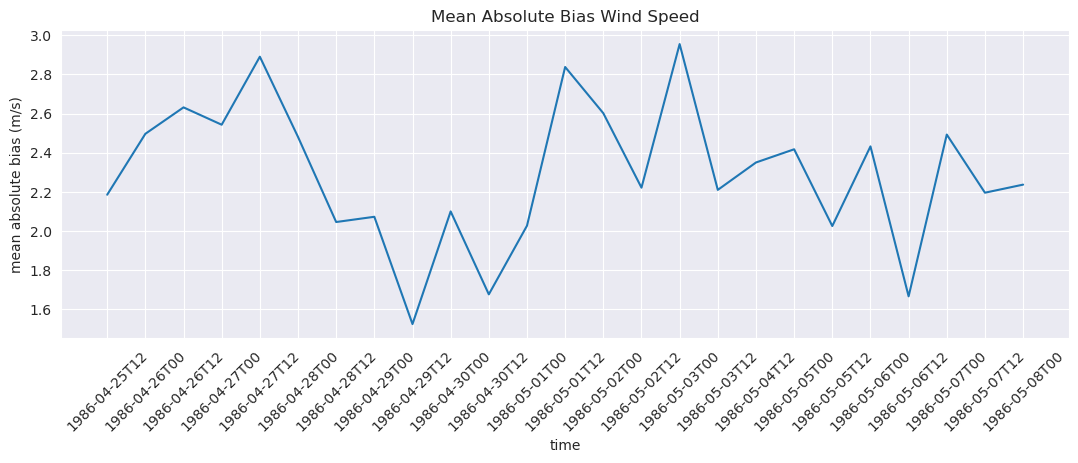

In [111]:
#Mean absolute bias for all timepoints for wind speed
mean_bias_list = []
longitude = []
names = []
time_list2=[]

sonde_files=[]

for i,times in enumerate(times_list):

    wdir_dist = []
    string=np.datetime_as_string(times_list[i], unit='h')
    time_list2.append(string)
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    

    for file in os.listdir("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"):

        #b = datetime64('1986-05-01T00:00:00.000000000')
        wind_data=xarray.open_mfdataset("/home/norah/master/data/wspeed_int/int_sonde_data_wspeed"+hour+"_"+day+"/"+file)

        sonde_files.append(file)
        file_list1=file.strip("_wspeed_model.nc")
        file_list=file_list1.split("_")
        names.append(file_list[0])
        lat = float(file_list[2])
        long = float(file_list[3])

        Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_"+hour+"_"+day+"_"+month+"_1986/"+file_list1+".txt", lat, long,times)
        Radiosonde1.find_horizontal_disp()
    
        #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

        #Radiosonde1.find_horizontal_disp()
        if i<5:

            wdir = wind_data["wdir_model"].values

        else:
            wdir = wind_data["wspeed_model"].values

        for w, r in zip(wdir, Radiosonde1.data["WSPD(knot)"]):

            phi = abs(w-r)

            #if phi > 180:
               # phi = 360-phi
               # wdir_dist.append(phi)

           # else:
            wdir_dist.append(phi)
            #print(w)
            #print(r)
            #print(phi)

        #wdir_dist.append(np.subtract(wdir, Radiosonde1.data["WSPD(knot)"]))
 
    mean_bias= np.mean(wdir_dist)

    mean_bias_list.append(mean_bias)
    longitude.append(Radiosonde1.lon)

fig = plt.figure(figsize=[13,4])
df = pd.DataFrame({"mean absolute bias (m/s)": mean_bias_list, "time":time_list2})
sns.set_style(style="darkgrid")
sns.lineplot(data=df, x="time", y="mean absolute bias (m/s)")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
  

plt.title("Mean Absolute Bias Wind Speed")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# interpolation in height

def height_interpolate_points(ds, geopot_levs, variable, variable_ground, height,x, y, time1):
    """
    Innput:
    File or array?
    
    Ourtput:
    A linnear interpolation weight t, and the two corresponding time points
    
    """
 
    ds = ds.isel(time=time1)
    #surf_temp = xarray.Dataset({"hybrid":ds["air_temperature_2m"].isel(y=y,x=x,height6=0).values[0]})
    #print(ds["air_temperature_2m"].isel(height6=0,y=y,x=x).values[0])
   # ds["air_tempreature_2m"] = ds["air_temperature_2m"].expand_dims(dim={"hybrid": 1})
    var_list=ds[variable].isel(y=y, x=x).values
    var_list = np.append(var_list, ds[variable_ground].isel(y=y,x=x,height33=0).values[0])
   
    #xarray.concat(ds["air_temperature_ml"].isel(y=y, x=x), surf_temp, "hybrid")

    #geopot_levs = hybrid_levs_to_height(filename, config, time)
    geopot_levs = geopot_levs.isel(y=y,x=x).squeeze().values
    geopot_levs = geopot_levs[2:]
    
    geopot_levs = np.append(geopot_levs,2)
    df_levs = pd.DataFrame(geopot_levs, columns = None)
    # Finds min distance
    ih = np.argmin((geopot_levs - height)**2)
    #print("height")
    #print(height)
 
    #k = min(df_levs[0], key=lambda x: abs(x - height))
    # Selecting the time point with minimum distance

    ih = int(ih)
  

    h1=ih
    h2=ih+1
    
    if ((geopot_levs[ih]-height) < 0):
        h2=ih
        h1=ih-1
        #print("down")
        
    h=1
    if ((geopot_levs[h2] - geopot_levs[h1]) < 0):
        h = (height - geopot_levs[h1]) / (geopot_levs[h2] - geopot_levs[h1])
        #print("here")
        #print("h")

    #print(geopot_levs[h1])
    #print(geopot_levs[h2])

    variable_1= var_list[h1]
    variable_2= var_list[h2]

    new_variable = variable_1+(variable_2-variable_1)*h
    
    #print(variable_1)
    #print(variable_2)


    #print("the new variable")
    #print(new_variable)

    return new_variable, h,h1,h2 

In [ ]:
#Mean bias for all times
for file1 in os.listdir("/home/norah/master/data/wdir/int_sonde_data00_01/"):

    for file2 in os.listdir("/home/norah/master/data/wdir"):
        
        wind_data=xarray.open_mfdataset("/home/norah/master/data/wdir/"+file2+"/"+file1)

        

Absolute Error

BY_33041_52.45_31.0
BE_6476_50.03_5.4


ValueError: x and y must have same first dimension, but have shapes (30,) and (25,)

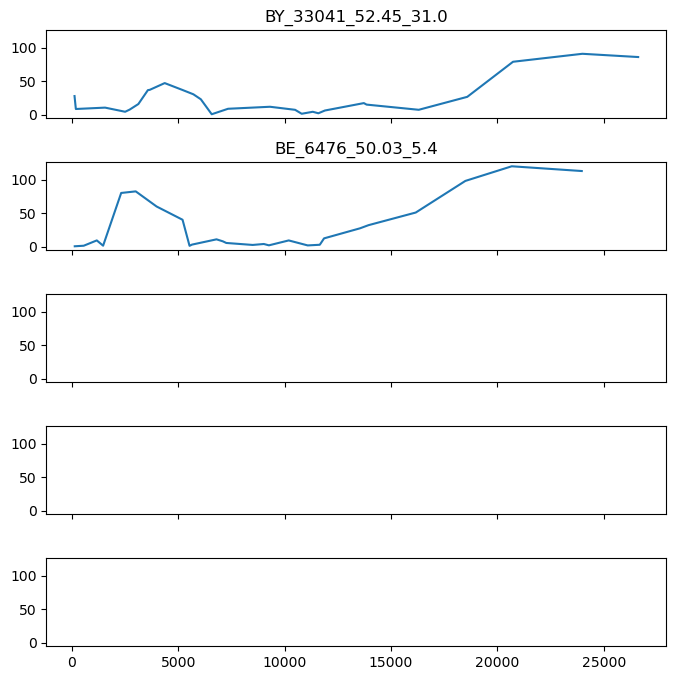

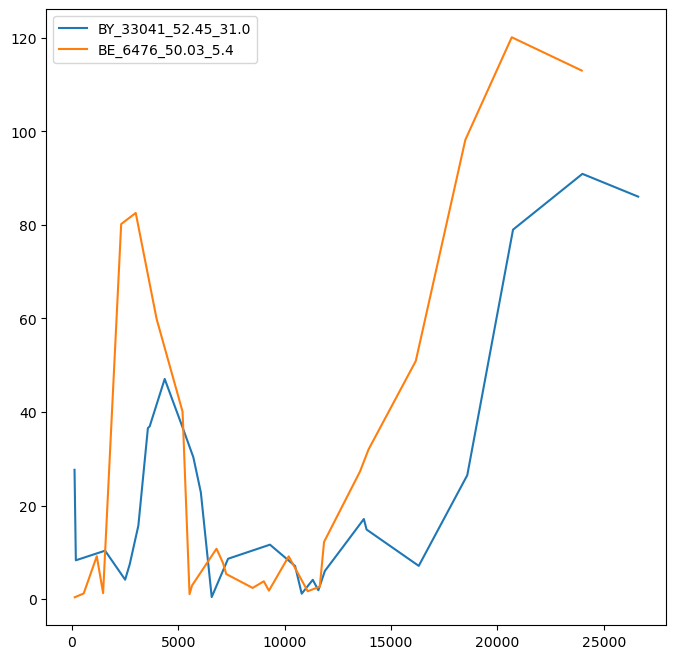

In [18]:

names = []
wdir_dist = []

fig1 = plt.figure(figsize=(8,8))
gs1 = fig1.add_gridspec(5, hspace=0.5)
ax1 = gs1.subplots(sharex=True, sharey=True)
#ax1 = gs1.subplots()
fig2 = plt.figure(figsize=(8,8))
#ax = gs.subplots(sharex=True, sharey=True)
ax2 = fig2.subplots()
for i,file in enumerate(os.listdir("/home/norah/master/data/int_sonde_data00_26/")[0:5]):
    
    abs_error = []

    wind_data=xarray.open_mfdataset("/home/norah/master/data/int_sonde_data00_26/"+file)


    file_list1=file.strip("_wdir_model.nc")
    file_list=file_list1.split("_")
    names.append(file_list[0]+"_"+file_list[1])
    lat = float(file_list[2])
    long = float(file_list[3])

    Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_00_26_04_1986/"+file_list1+".txt", lat, long,b)
    Radiosonde1.find_horizontal_disp()
    
    #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

    #Radiosonde1.find_horizontal_disp()      
    wdir = wind_data["wdir_model"].values
    height = wind_data["height"].values

    for w, r in zip(wdir, Radiosonde1.data["DRCT(deg)"]):

        phi = abs(w-r)%369

        if phi > 180:
            phi = 360-phi
            abs_error.append(phi)

        else:
            abs_error.append(phi)
        #print(w)
        #print(r)
        #print(phi)

    ax1[i].plot(height,abs_error)
    ax2.plot(height,abs_error, label=file_list1)
    ax2.legend()
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
  

    ax1[i].set_title(file_list1)
    print(file_list1)

plt.ylabel("abs_error")
plt.xlabel("geopotential height(m)")

Checking alpha

<xarray.DataArray 'alpha' (y: 1429, x: 1489)>
[2127781 values with dtype=float32]
Dimensions without coordinates: y, x
(array([1428, 1428]), array([791, 792]))


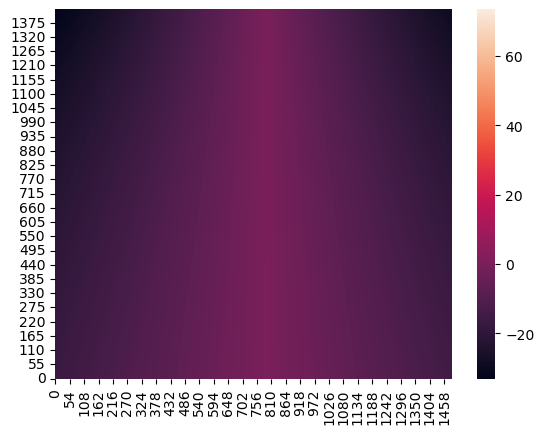

In [12]:
import seaborn as sns
file_alpha = "/lustre/storeB/project/fou/kl/cerad/Meteorology/AROME-CHERNOBYL/alpha_chernobyl.nc"

ds_alpha = xarray.open_dataset(file_alpha)   
ds_alpha = ds_alpha["alpha"]

print(ds_alpha)
sns.heatmap(ds_alpha)

plt.ylim(0,1428)
plt.xlim(0,1488)

turn_point= np.where(ds_alpha==ds_alpha.max())
print(turn_point)

In [4]:
    # loading the Chernobyl data from the Arome model
